# Question A3

Find the optimal number of hidden neurons for first hidden layer of the 4-layer network (3 hidden layers, output layer) designed in Question 1 and 2

#### Plot the mean cross-validation accuracies on the final epoch for different numbers of hidden-layer neurons using a scatter plot. Limit the search space of the number of neurons to {64, 128, 256}. Continue using 5-fold cross validation on training dataset. Select the optimal number of neurons for the hidden layer. State the rationale for your selection.

This might take a while to run, approximately 20 - 30 min, so plan your time carefully.

1. Firstly, we import relevant libraries.

In [1]:
import tqdm
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from scipy.io import wavfile as wav

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from common_utils import set_seed

# setting seed
set_seed()

2. To reduce repeated code, place your

- network (MLP defined in QA1)
- torch datasets (CustomDataset defined in QA1)
- loss function (loss_fn defined in QA1)

in a separate file called **common_utils.py**

Import them into this file. You will not be repenalised for any error in QA1 here as the code in QA1 will not be remarked.

The following code cell will not be marked.

In [2]:
# YOUR CODE HERE
from common_utils import MLP, CustomDataset, loss_fn

df = pd.read_csv('simplified.csv')
df['label'] = df['filename'].str.split('_').str[-2]
label_encoder = preprocessing.LabelEncoder()
# df['label'] #it was neg or pos
df['label'] = label_encoder.fit_transform(df['label'])
# df['label'] #now its 0 or 1
y_train = df['label'].to_numpy()
X_train = df.drop(['label', 'filename'], axis=1)

3. Perform hyperparameter tuning for the different neurons with 5-fold cross validation.

In [3]:
def train(model, X_train_scaled, y_train2, X_val_scaled, y_val2, batch_size):

    # YOUR CODE HERE
    #I have a seperate train_loop and test_loop instead below
    

    return train_accuracies, train_losses, test_accuracies, test_losses, times

In [4]:
def train_loop(dataloader, model, loss_fn, optimizer): #from eg5.4a (classification of MINST images with ealy stopping, I had to edit to fit binary classification )
    for X, y in dataloader:
        # Compute prediction and loss
        pred = model(X) #making predictions using model
        loss = loss_fn(pred, y) #computing loss by comparing predictions to actual label
 
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    correct = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            correct += ((pred > 0.5).eq(y)).type(torch.float).sum().item()

    correct /= size

    return correct


def find_optimal_hyperparameter(X_train, y_train, parameters, mode, batch_size):
    # YOUR CODE HERE
    cross_validation_accuracies = {}
    cross_validation_times = {}
    for num_neuron in parameters:
        accuracies = []
        times = []

        kf = KFold(n_splits=5, shuffle=True, random_state=33)
        for train_idx, val_idx in kf.split(X_train, y_train):
            model = MLP(77, num_neuron, 1)
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
            X_train2, X_val2 = X_train[train_idx], X_train[val_idx]
            y_train2, y_val2 = y_train[train_idx], y_train[val_idx]

            # scale the data
            scaler = preprocessing.StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train2)
            X_val_scaled = scaler.transform(X_val2)

            # create dataset and dataloader
            train_data = CustomDataset(X_train_scaled, y_train2)
            train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

            val_dataset = CustomDataset(X_val_scaled, y_val2)
            val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

            val_acc = []

            for epoch in range(20): #arbitarily set epoch to 20 since question did not specify
                if epoch == 19:
                    start_time = time.time()
                #train each fold for 10 epochs, and here i used code from partA1
                train_loop(train_dataloader, model, loss_fn, optimizer)
    
                v_acc = test_loop(val_dataloader, model, loss_fn)
                val_acc.append(v_acc)


            end_time = time.time()
            accuracies.append(val_acc[-1])
            times.append(end_time - start_time)

        cross_validation_accuracies[num_neuron] = np.mean(accuracies) #update the accuracy
        cross_validation_times[num_neuron] = np.mean(times) #update the time taken

    

    return cross_validation_accuracies, cross_validation_times

'''
optimal_bs = 0. Fill your optimal batch size in the following code.
'''
# YOUR CODE HERE
optimal_bs = 128 #from qA2
num_neurons = [64, 128, 256]


cross_validation_accuracies, cross_validation_times = find_optimal_hyperparameter(X_train.to_numpy(), y_train, num_neurons, 'num_neurons', optimal_bs)

In [5]:
print(cross_validation_accuracies)

{64: 0.594428142709651, 128: 0.6016419354905275, 256: 0.6152451141224612}


4. Plot the cross-validation accuracies against the number of epochs for different numbers of hidden-layer neurons. Limit the search space of the number of neurons to {64, 128, 256}.

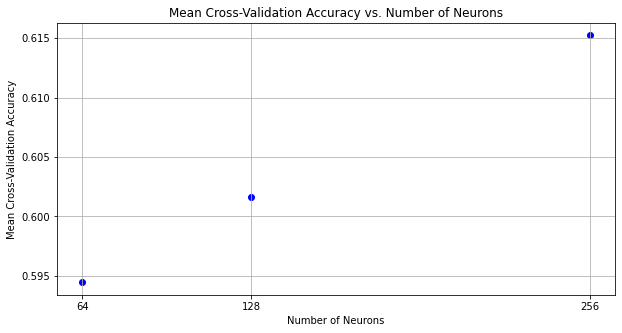

In [6]:
# YOUR CODE HERE
#i am just going to plot the mean cross validation accuracies on the final epoch fot the different numbersof hidden layer neurons based on assignment question, and not on the markdown comment above
accuracies = [acc for acc in cross_validation_accuracies.values()]

plt.figure(figsize=(10, 5))
plt.scatter(num_neurons, accuracies, marker='o', color='b', label='Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. Number of Neurons')
plt.xticks(num_neurons)  # Display all the specified neuron values on the x-axis
plt.grid(True)  # Add grid lines for better readability
plt.show()

5. Select the optimal number of neurons for the hidden layer. State the rationale for your selection.

In [7]:
optimal_neurons = 256
reason = "It has the highest mean cross validation accuracy"
# YOUR CODE HERE

6. Plot the train and test accuracies against training epochs with the optimal number of neurons using a line plot.

In [8]:
# YOUR CODE HERE

df = pd.read_csv('simplified.csv')
df['label'] = df['filename'].str.split('_').str[-2]
label_encoder = preprocessing.LabelEncoder()
# df['label'] #it was neg or pos
df['label'] = label_encoder.fit_transform(df['label'])
# df['label'] #now its 0 or 1
y = df['label'].to_numpy()
X = df.drop(['label', 'filename'], axis=1).to_numpy()



def train_loop2(dataloader, model, loss_fn, optimizer): #from eg5.4a (classification of MINST images with ealy stopping, I had to edit to fit binary classification )
    size = len(dataloader.dataset)
    correct = 0
    for X, y in dataloader:
        # Compute prediction and loss
        pred = model(X) #making predictions using model
        loss = loss_fn(pred, y) #computing loss by comparing predictions to actual label

        correct += ((pred > 0.5).eq(y)).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    correct /= size
    return correct

def test_loop2(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    correct = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            correct += ((pred > 0.5).eq(y)).type(torch.float).sum().item()

    correct /= size

    return correct

train_accuracies_per_epoch = {} # I will store the accuracy for each epoch for each fold fold -> [accuracies for each epoch]
val_accuracies_per_epoch = {}
kf = KFold(n_splits=5, shuffle=True, random_state=33)
i = 1
for train_idx, val_idx in kf.split(X, y):
    model = MLP(77, 256, 1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    X_train2, X_val2 = X[train_idx], X[val_idx]
    y_train2, y_val2 = y[train_idx], y[val_idx]

    # scale the data
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train2)
    X_val_scaled = scaler.transform(X_val2)

    # create dataset and dataloader
    train_data = CustomDataset(X_train_scaled, y_train2)
    train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)

    val_dataset = CustomDataset(X_val_scaled, y_val2)
    val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=True)

    train_acc, val_acc = [], []

    for epoch in range(20): #arbitarily set epoch to 20 since question did not specify
        t_acc = train_loop2(train_dataloader, model, loss_fn, optimizer)
        train_acc.append(t_acc)

        v_acc = test_loop2(val_dataloader, model, loss_fn)
        val_acc.append(v_acc)

    train_accuracies_per_epoch[i] = train_acc
    val_accuracies_per_epoch[i] = val_acc
    i+=1


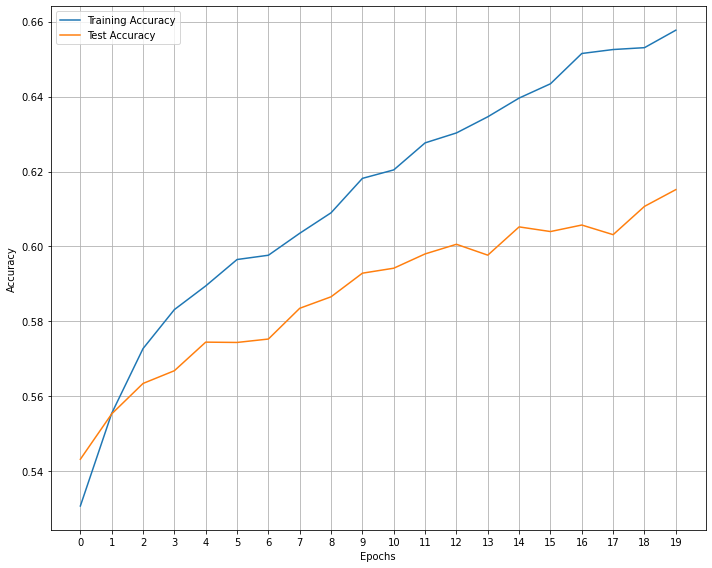

In [13]:
fig = plt.figure(figsize=(10,8))
training_accuracies = []
test_accuracies = []
for i in range(20):
    tr, ts = 0.0, 0.0
    for k in range(1,6):
        tr += train_accuracies_per_epoch[k][i]
        ts += val_accuracies_per_epoch[k][i]
    training_accuracies.append(tr/5)
    test_accuracies.append(ts/5)
    
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(test_accuracies,label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(20))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()